# Make python speak SQL

In [21]:
! pip install -U pandas
! pip install -U pandasql

Requirement already up-to-date: pandas in /opt/conda/lib/python3.4/site-packages
Requirement already up-to-date: numpy>=1.7.0 in /opt/conda/lib/python3.4/site-packages (from pandas)
Requirement already up-to-date: python-dateutil>=2 in /opt/conda/lib/python3.4/site-packages (from pandas)
Requirement already up-to-date: pytz>=2011k in /opt/conda/lib/python3.4/site-packages (from pandas)
Requirement already up-to-date: six>=1.5 in /opt/conda/lib/python3.4/site-packages (from python-dateutil>=2->pandas)
Requirement already up-to-date: pandasql in /opt/conda/lib/python3.4/site-packages
Requirement already up-to-date: pandas in /opt/conda/lib/python3.4/site-packages (from pandasql)
Requirement already up-to-date: sqlalchemy in /opt/conda/lib/python3.4/site-packages (from pandasql)
Requirement already up-to-date: numpy in /opt/conda/lib/python3.4/site-packages (from pandasql)
Requirement already up-to-date: python-dateutil>=2 in /opt/conda/lib/python3.4/site-packages (from pandas->pandasql)


In [1]:
from pandasql import sqldf, load_meat, load_births

# load built-in dataset

meat = load_meat()
births = load_births()

## Meat dataset

In [7]:
meat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827 entries, 0 to 826
Data columns (total 8 columns):
date               827 non-null datetime64[ns]
beef               827 non-null float64
veal               827 non-null float64
pork               827 non-null float64
lamb_and_mutton    827 non-null float64
broilers           635 non-null float64
other_chicken      143 non-null float64
turkey             635 non-null float64
dtypes: datetime64[ns](1), float64(7)
memory usage: 51.8 KB


In [8]:
meat.head()

,date,beef,veal,pork,lamb_and_mutton,broilers,other_chicken,turkey
0,1944-01-01,751.0,85.0,1280.0,89.0,NaN,NaN,NaN
1,1944-02-01,713.0,77.0,1169.0,72.0,NaN,NaN,NaN
2,1944-03-01,741.0,90.0,1128.0,75.0,NaN,NaN,NaN
3,1944-04-01,650.0,89.0,978.0,66.0,NaN,NaN,NaN
4,1944-05-01,681.0,106.0,1029.0,78.0,NaN,NaN,NaN


## Birth dataset

In [9]:
births.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 2 columns):
date      408 non-null datetime64[ns]
births    408 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.5 KB


In [10]:
births.head()

,date,births
0,1975-01-01,265775
1,1975-02-01,241045
2,1975-03-01,268849
3,1975-04-01,247455
4,1975-05-01,254545


## An odd graph

Let's make a graph to visualize the data. 

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

from pandasql import *
import pandas as pd


In [13]:
pysqldf = lambda q: sqldf(q, globals())

q = """
SELECT 
   m.date,
   m.beef,
   b.births
FROM
  meat m
LEFT JOIN
  births b ON m.date = b.date
WHERE
  m.date > '1974-12-31';
"""

df = pysqldf(q)

/opt/conda/lib/python3.4/site-packages/IPython/kernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
/opt/conda/lib/python3.4/site-packages/IPython/kernel/__main__.py:10: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()


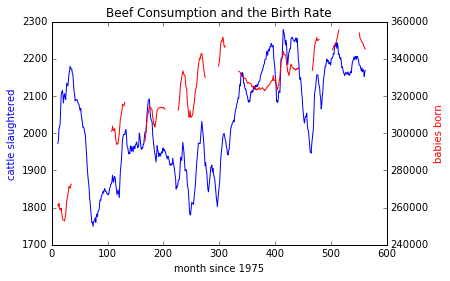

In [17]:
df.births.fillna(method='backfill')

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(pd.rolling_mean(df['beef'], 12), color='b')
ax1.set_xlabel('month since 1975')
ax1.set_ylabel('cattle slaughtered', color='b')

ax2 = ax1.twinx()
ax2.plot(pd.rolling_mean(df['births'], 12), color='r')
ax2.set_ylabel('babies born', color='r')
plt.title("Beef Consumption and the Birth Rate")
plt.show()


## Births per year

In [21]:
q = """
    SELECT
        strftime("%Y", date) as date
        , SUM(births) as births
    FROM births
    GROUP BY 1
    ORDER BY 1;
            """

bpy_df = sqldf(q, locals())
bpy_df.head()

,date,births
0,1975,3136965
1,1976,6304156
2,1979,3333279
3,1982,3612258
4,1983,7333238


## lovals() vs globals()

In [22]:
def pysqldf(q):
    return sqldf(q, globals())

q = """
    SELECT
        *
    FROM
        births
    LIMIT 10;"""

df = pysqldf(q)
df.head()

,date,births
0,1975-01-01 00:00:00.000000,265775
1,1975-02-01 00:00:00.000000,241045
2,1975-03-01 00:00:00.000000,268849
3,1975-04-01 00:00:00.000000,247455
4,1975-05-01 00:00:00.000000,254545
